## RAGAS WorkBook

Before proceeding installed the necessary requirement using:      
pip install -r requirements.txt

Firstly, Create an instance of the  AzureChatOpenAI class

In [ ]:
import os
from langchain_openai.chat_models import AzureChatOpenAI
# Configure your Azure Endpoint and Model Names as environment variables

azure_model = AzureChatOpenAI(openai_api_version = "2023-03-15-preview",
    azure_deployment=os.environ.get('gpt-35-turbo'),
    azure_endpoint=os.environ.get('azure_endpoint')
)

To obtain an embedding vector for a piece of text, we make a request to the embeddings endpoint

In [ ]:
from langchain_openai.embeddings import AzureOpenAIEmbeddings

azure_embeddings= AzureOpenAIEmbeddings(openai_api_version="2024-02-15-preview",
    azure_deployment=os.environ.get('text-embedding-ada-002'),
    azure_endpoint=os.environ.get('azure_endpoint')
)

In this step, we’ll import the necessary metrics from the installed Ragas packages

In [ ]:
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision,
    context_relevancy,
    answer_correctness,
    answer_similarity
)

Load the data from a json file

In [ ]:
from datasets import load_dataset

basic_qa_ragas_dataset = load_dataset('json', data_files='input_data.json')
data = basic_qa_ragas_dataset['train']

Using the imported metrics from ragas, evaluate the columns: question, answer, context and ground_truth.

In [ ]:
from ragas import evaluate
result = evaluate(
  data,
  metrics=[
      context_precision,
      faithfulness,
      answer_relevancy,
      context_recall,
      context_relevancy,
      answer_correctness,
      answer_similarity
  ],llm=azure_model, embeddings=azure_embeddings
  
)

print(result)

{'context_precision': 0.9000,   
'faithfulness': 1.0000,      
'answer_relevancy': 0.9222,         
'context_recall': 0.8000,      
'context_relevancy': 0.0937,       
'answer_correctness': 0.5723,          
'answer_similarity': 0.9396}

Visualize the computed metrics results into a Spider  Plot using Plotly

In [ ]:
import plotly.graph_objects as go


data = {
    'context_precision': result['context_precision'],
    'faithfulness': result['faithfulness'],
    'answer_relevancy': result['answer_relevancy'],
    'context_recall': result['context_recall'],
    'context_relevancy': result['context_relevancy'],
    'answer_correctness': result['answer_correctness'],
    'answer_similarity': result['answer_similarity']
}

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list(data.values()),
    theta=list(data.keys()),
    fill='toself',
    name='Ensemble RAG'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='Retrieval Augmented Generation - Evaluation(Ragas)',
    width=800,
)

fig.show()


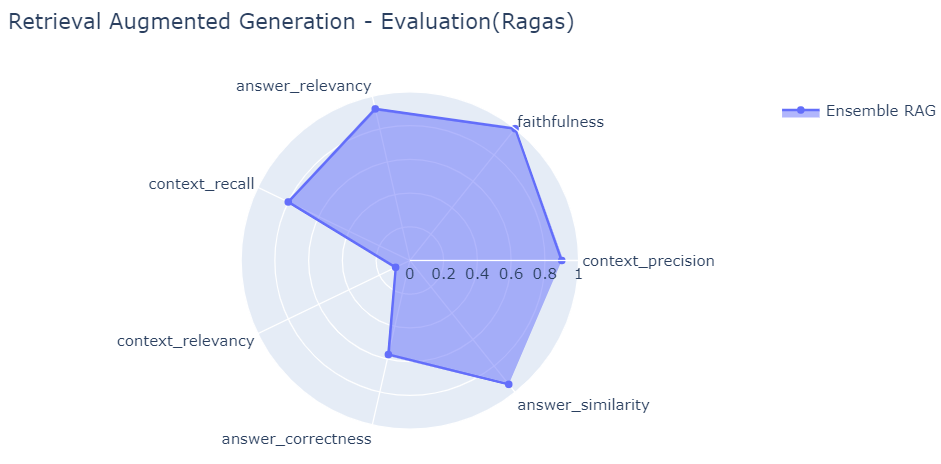